# Machine Learning Engineer Nanodegree
## Capstone Project
Elissa Backas
August 15, 2017


Colun
* CASEID  "Case identification number" #id number to correlate with the other survey
* PREGORDR   "Pregnancy order (number)"
* PREGEND1    "BC-1 How Pregnancy Ended - 1st mention"
* WKSGEST     "Gestational length of completed pregnancy (in weeks)"
* BPA_BDSCHECK1     "Whether 1st liveborn baby from this pregnancy was BPA or BDS" #drop babies who died or were given away for adoption
* BABYSEX1     "BD-2 Sex of 1st Liveborn Baby from This Pregnancy"
* CMBABDOB     "CM for baby's or babies' date of birth (delivery date)"
* HPAGELB     "BD-6 Father's age at time of child(ren) s birth"
* PRIORSMK     "BE-3 Amount R smoked in 6 mos before R knew she was pregnant" #I'd like to use this, but not enough data
* NPOSTSMK     "BE-5 Amount R smoked during pregnancy after R knew she was preg" #I'd like to use this, but not enough data
* GETPRENA     "BE-6 Any prenatal care for this pregnancy" #I'd like to use this, but not enough data
* CMKIDIED,2,3   "CM for child's date of death - 1st from this pregnancy" #only multiples died, will remove those rows from the data
* OUTCOM_S     "Outcome of pregnancy (based on corrected/chron sorted data)"
* NBRNLV_S     "# of babies born alive from this preg (based on CCSD)" #drop women with NaN for this
* COHPBEG     "EG-18a Was R living w/father of preg at beginning of preg"
* COHPEND     "EG-18b Was R living w/father of preg when preg ended/baby was born"
* BIRTHORD     "Birth order"
* AGEPREG     "Age at pregnancy outcome"
* DATECON     "CM date of conception"
* AGECON     "Age at time of conception"
* FMAROUT5     "Formal marital status at pregnancy outcome"
* PMARPREG     "Whether pregnancy ended before R's 1st marriage (premaritally)"
* RMAROUT6     "Informal marital status at pregnancy outcome - 6 categories"
* FMARCON5     "Formal marital status at conception - 5 categories"
* RMARCON6     "Informal marital status at conception - 6 categories"
* PAYDELIV     "Payment for delivery"
* LBW1     "Low birthweight - 1st baby from this preg"
* **BFEEDWKS     "Duration of breastfeeding in weeks" #trying to predict this**
* EDUCAT     "Education (completed years of schooling)"
* HIEDUC     "Highest completed year of school or degree"
* RACE     "Race"
* HISPANIC     "Hispanic origin"
* HISPRACE     "Race & Hispanic origin of respondent - 1977 OMB standards (respondent recode)"
* HISPRACE2     "Race & Hispanic origin of respondent - 1997 OMB standards (respondent recode)"
* RCURPREG     "Pregnant at time of interview"
* PREGNUM     "CAPI-based total number of pregnancies"
* PARITY     "Total number of live births"
* CURR_INS     "Current health insurance coverage"
* PUBASSIS     "Whether R received public assistance in prior calendar year"
* POVERTY    "Poverty level income"
* LABORFOR     "Labor force status"
* RELIGION     "Current religious affiliation"
* METRO     "Place of residence (Metropolitan / Nonmetropolitan)"
* BRNOUT     "IB-8 R born outside of US"
* YRSTRUS     "Year R came to the United States" #not enough data


In [1]:
import pandas as pd
import thinkstats2
import numpy as np

def ReadFemPreg(dct_file='2013_2015_FemPregSetup.dct',
                dat_file='2013_2015_FemPregData.dat'):
    #thinkstats converter 
    #https://github.com/boydjj/think_stats
    dct = thinkstats2.ReadStataDct(dct_file)
    #https://www.safaribooksonline.com/library/view/think-stats-2nd/9781491907344/ch01.html
    df = pd.read_fwf(dat_file, colspecs=dct.colspecs, names=dct.names, header=None)
    return df

In [3]:
myfile = ReadFemPreg()
myfile

,CASEID,PREGORDR,HOWPREG_N,HOWPREG_P,MOSCURRP,NOWPRGDK,PREGEND1,PREGEND2,HOWENDDK,NBRNALIV,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR
0,60418,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
1,60418,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
2,60418,3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
3,60419,1,33.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,...,3,318,1388,1376,1345,1333,1321,16,1,2015
4,60420,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,1,339,1388,1376,1345,1333,1321,16,1,2015
5,60420,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1,339,1388,1376,1345,1333,1321,16,1,2015
6,60423,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
7,60423,2,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
8,60426,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,3,344,1368,1356,1321,1309,1297,9,1,2013
9,60426,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,3,344,1368,1356,1321,1309,1297,9,1,2013


In [4]:
#drop women still breastfeeding
myfile = myfile[myfile.BFEEDWKS != 994]
#drop women with no breastfeeding data
myfile = myfile[myfile.BFEEDWKS.notnull()]
#if never breastfed, set number of weeks equal to 0
myfile.loc[myfile['BFEEDWKS'] == 995, 'BFEEDWKS'] = 0
#drop if no babies born
myfile = myfile.dropna(subset=['NBRNLV_S'])
#drop if pregnancy ended in miscarriage, stilbirth or abortion
myfile = myfile[myfile.PREGEND1 >= 5]
#drop if baby died or given away for adoption
myfile = myfile[myfile.BPA_BDSCHECK1 == 0]
#fill "not ascertained, refused, don't know answers with mean
myfile.loc[myfile['CMBABDOB'] >= 9997, 'CMBABDOB'] = myfile.CMBABDOB.mean()
myfile.loc[myfile['HPAGELB'] >= 98, 'HPAGELB'] = myfile.HPAGELB.mean()
#fill 4 "refused" answers with no
myfile.loc[myfile['BRNOUT'] == 8, 'BRNOUT'] = 5

C:\conda\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


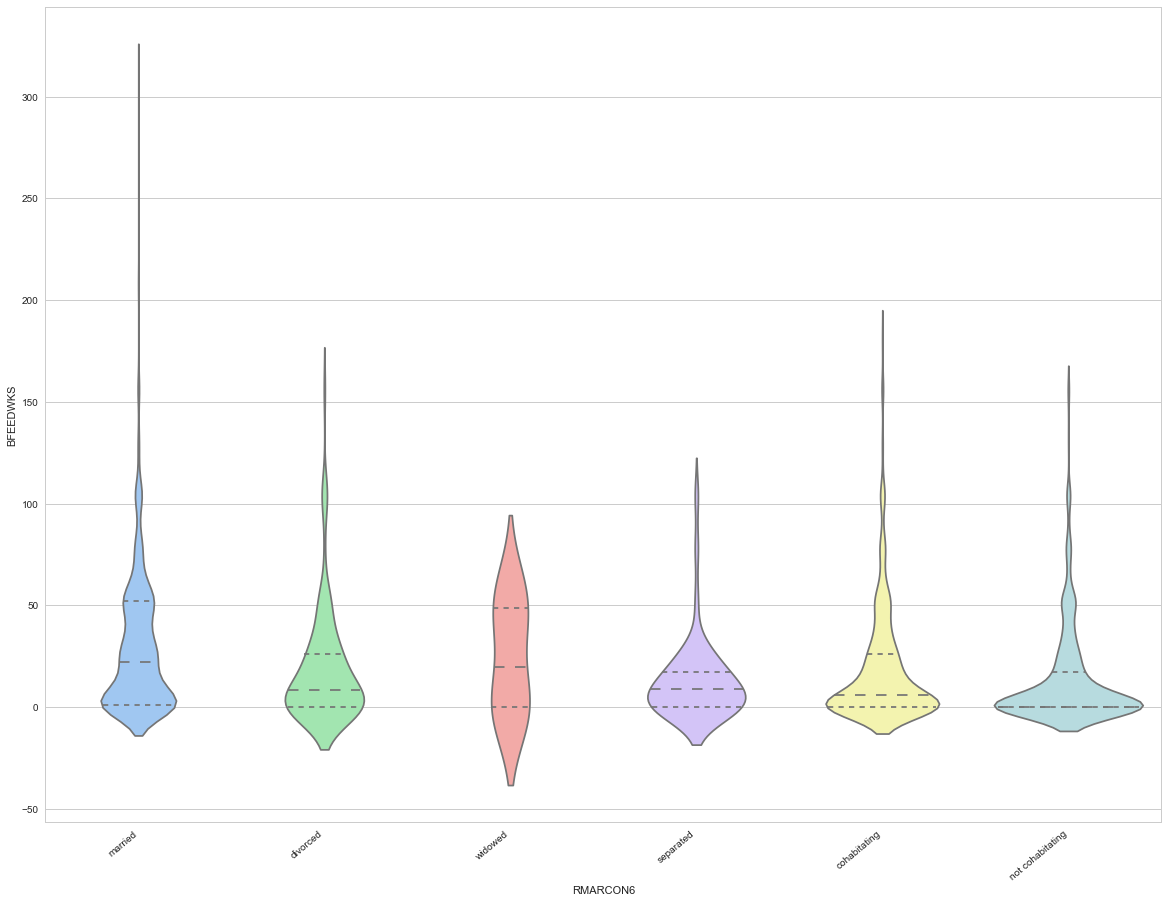

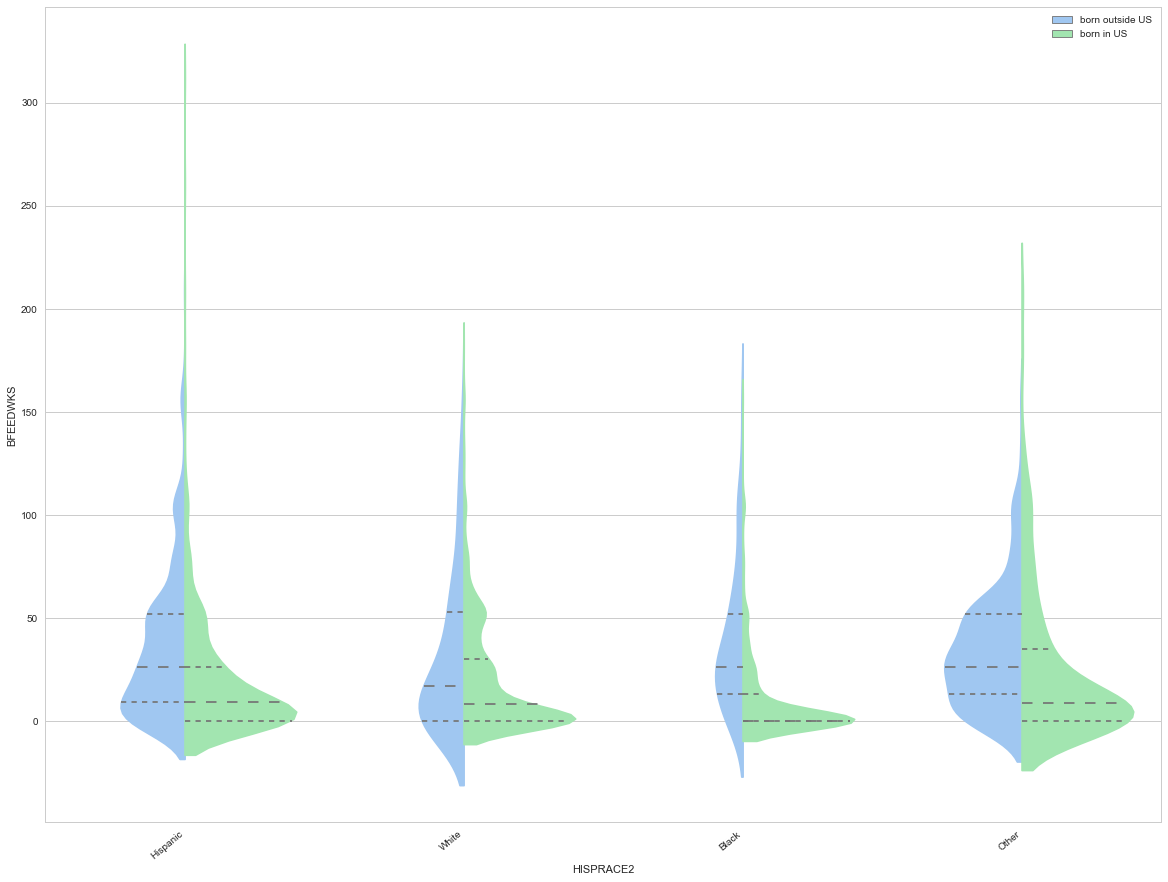

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a violinplot comparing marital status and number of weeks a woman breastfed
mypplot = sns.violinplot(x="RMARCON6", y="BFEEDWKS", data=myfile, inner="quart")
mypplot.set_xticklabels(['married', 'divorced', 'widowed', 'separated', 'cohabitating', 'not cohabitating'], rotation=40, ha="right")
plt.figure(figsize=(20,15))
mypplot = sns.violinplot(x="HISPRACE2", y="BFEEDWKS", data=myfile, split=True, hue='BRNOUT',
              inner="quart", legend_out = True)
#modify legend
handles, labels = mypplot.get_axes().get_legend_handles_labels()
mypplot.get_axes().legend(handles, ["born outside US", "born in US"], loc='upper right')
mypplot.set_xticklabels(['Hispanic', 'White', 'Black', 'Other'], rotation=40, ha="right")
plt.show()

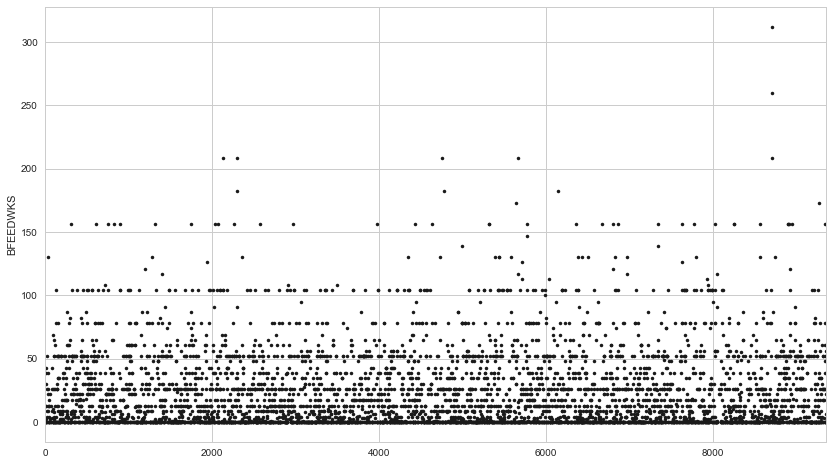

In [7]:
%matplotlib inline
myfile['BFEEDWKS'].plot(style='k.', figsize = (14,8))
plt.ylabel('BFEEDWKS')
plt.show()
#sns.distplot(myfile.BFEEDWKS)

In [50]:
df = pd.DataFrame(myfile, columns=['PREGORDR', 'PREGEND1', 'WKSGEST', 'BABYSEX1', 'CMBABDOB',  'HPAGELB', 'COHPBEG', 'COHPEND', 'BIRTHORD', 'AGEPREG', 'DATECON', 'AGECON', 'PMARPREG', 'RMAROUT6', 'RMARCON6', 'PAYDELIV', 'LBW1', 'BFEEDWKS', 'EDUCAT', 'HISPRACE2', 'PREGNUM', 'PARITY', 'CURR_INS', 'PUBASSIS', 'POVERTY', 'LABORFOR', 'RELIGION', 'METRO', 'BRNOUT'])
#inspect the features to make sure there's enough data for each and nothing looks "off"
for feature in df.keys():
    print df[feature].value_counts(dropna=False)
    print df[feature].describe()

1     1963
2     1565
3      968
4      501
5      233
6      104
7       54
8       24
9       11
10       6
11       4
12       2
20       1
Name: PREGORDR, dtype: int64
count    5436.000000
mean        2.319169
std         1.493761
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: PREGORDR, dtype: float64
6.0    3882
5.0    1554
Name: PREGEND1, dtype: int64
count    5436.000000
mean        5.714128
std         0.451870
min         5.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: PREGEND1, dtype: float64
39.0    1978
40.0    1125
38.0     656
37.0     368
41.0     356
36.0     251
42.0     183
35.0     183
32.0      79
34.0      55
43.0      47
30.0      43
28.0      22
33.0      21
26.0      14
29.0      13
27.0      12
31.0       8
24.0       6
44.0       6
25.0       3
45.0       3
46.0       2
23.0       1
48.0       1
Name: WKSGEST, dtype: int64
count    5436.000000
mea

In [51]:
from sklearn.preprocessing import MinMaxScaler

continuous = ['PREGORDR','WKSGEST', 'CMBABDOB', 'HPAGELB', 'BIRTHORD', 'AGEPREG', 
              'DATECON', 'AGECON','BFEEDWKS','EDUCAT','PREGNUM','PARITY','POVERTY']
discrete = ['PREGEND1', 'BABYSEX1', 'COHPBEG', 'COHPEND', 'PMARPREG',
            'RMAROUT6', 'RMARCON6', 'PAYDELIV', 'LBW1',
            'HISPRACE2','CURR_INS','PUBASSIS','LABORFOR',
           'RELIGION','METRO','BRNOUT']
#apply logorithmic function to continuous features to reduce extremes
df[continuous] = df[continuous].apply(lambda x: np.log(x + 1))
scaler = MinMaxScaler(feature_range=(0, 1))
#scale continuous features
scaler.fit(df[continuous])
df[continuous] = scaler.transform(df[continuous])
#one hot encode discrete features
df = pd.get_dummies(df, columns=discrete)
for feature in df.keys():
    print df[feature].value_counts(dropna=False)
    print df[feature].describe()
#create labels
labels = df['BFEEDWKS']
#df = df.drop('BFEEDWKS', axis = 1)

0.000000    1963
0.172437    1565
0.294784     968
0.389683     501
0.467221     233
0.532779     104
0.589567      54
0.639659      24
0.684467      11
0.725000       6
0.762005       4
0.796046       2
1.000000       1
Name: PREGORDR, dtype: int64
count    5436.000000
mean        0.180174
std         0.167306
min         0.000000
25%         0.000000
50%         0.172437
75%         0.294784
max         1.000000
Name: PREGORDR, dtype: float64
0.715676    1978
0.750271    1125
0.680205     656
0.643813     368
0.784032     356
0.606451     251
0.568064     183
0.816999     183
0.446160      79
0.528596      55
0.849207      47
0.358567      43
0.265132      22
0.487984      21
0.165016      14
0.312628      13
0.215968      12
0.403048       8
0.057192       6
0.880692       6
0.112141       3
0.911485       3
0.941616       2
0.000000       1
1.000000       1
Name: WKSGEST, dtype: int64
count    5436.000000
mean        0.696671
std         0.092969
min         0.000000
25%         0.

In [10]:
#apply PCA and produce visualization
from sklearn.decomposition import PCA
import matplotlib.cm as cm
pca = PCA(n_components=15)
pca.fit(df)

def pca_results(good_data, pca):
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    print(variance_ratios)

    
    return pd.DataFrame(pca.components_, columns=good_data.columns, index=dimensions)

# Generate PCA results
pca_results = pca_results(df, pca)
#reduced_data = pca.transform(df)

              Explained Variance
Dimension 1               0.1794
Dimension 2               0.0973
Dimension 3               0.0798
Dimension 4               0.0619
Dimension 5               0.0571
Dimension 6               0.0463
Dimension 7               0.0438
Dimension 8               0.0370
Dimension 9               0.0335
Dimension 10              0.0282
Dimension 11              0.0264
Dimension 12              0.0245
Dimension 13              0.0229
Dimension 14              0.0215
Dimension 15              0.0200


In [11]:
from sklearn.cross_validation import train_test_split

#done with BFEEDWKS in df, drop it and create dataframe from the features we're going to train on
features = df.drop('BFEEDWKS', axis = 1)
#features = features.drop(['AGEPREG','CMBABDOB','PMARPREG_2.0','PREGNUM'], axis=1)
# Split the 'features' and 'breastfeeding' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.1, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 4892 samples.
Testing set has 544 samples.


C:\conda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

reg = DecisionTreeRegressor(random_state=3)
reg.fit(X_train, y_train)
predictions_test = reg.predict(X_test)
predictions_train = reg.predict(X_train[:300])
print('DecisionTreeRegressor r^2 train score {:.4f}'.format(r2_score(y_train[:300], predictions_train)))
print('DecisionTreeRegressor r^2 test score {:.4f}'.format(r2_score(y_test, predictions_test)))

reg = RandomForestRegressor(random_state=3)
reg.fit(X_train, y_train)
predictions_test = reg.predict(X_test)
predictions_train = reg.predict(X_train[:300])
print('RandomFoestRegressor r^2 train score {:.4f}'.format(r2_score(y_train[:300], predictions_train)))
print('RandomFoestRegressor r^2 test score {:.4f}'.format(r2_score(y_test, predictions_test)))

reg = MLPRegressor(random_state=3)
reg.fit(X_train, y_train)
predictions_test = reg.predict(X_test)
predictions_train = reg.predict(X_train[:300])
print('MLPRegressor r^2 train score {:.4f}'.format(r2_score(y_train[:300], predictions_train)))
print('MLPRegressor r^2 test score {:.4f}'.format(r2_score(y_test, predictions_test)))

DecisionTreeRegressor r^2 train score 1.0000
DecisionTreeRegressor r^2 test score -0.2766
RandomFoestRegressor r^2 train score 0.8688
RandomFoestRegressor r^2 test score 0.3423
MLPRegressor r^2 train score 0.5220
MLPRegressor r^2 test score 0.2176


In [13]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

#Initialize the classifier with parameters I already tuned
reg2 = RandomForestRegressor(random_state=3, n_estimators=300, min_samples_split=5, min_samples_leaf=7)

#this was the last one I played with
parameters = {'max_leaf_nodes':(100,500,600)}

scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator = reg2, param_grid = parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_reg= grid_fit.best_estimator_
print(grid_fit.best_params_ )

# Make predictions using the unoptimized and model
predictions = (reg2.fit(X_train, y_train)).predict(X_test)
best_predictions = best_reg.predict(X_test)

print "Unoptimized model\n------"
print "r^2 score on testing data: {:.4f}".format(r2_score(y_test, predictions))
print "\nOptimized Model\n------"
print "Final r^2 score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions))


C:\conda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_leaf_nodes': 500}
Unoptimized model
------
r^2 score on testing data: 0.3618

Optimized Model
------
Final r^2 score on the testing data: 0.3621


ValueError: incompatible sizes: argument 'height' must be length 5 or scalar

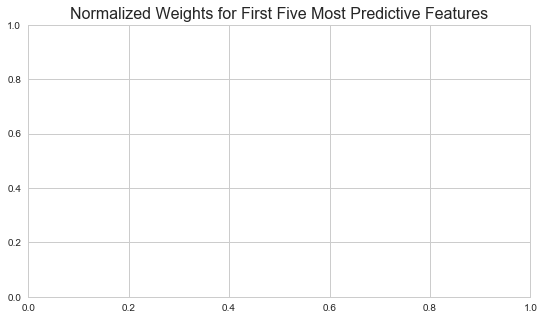

In [16]:
import visuals as vs
importances = best_reg.feature_importances_
vs.feature_plot(importances, X_train, y_train)
X_train_reduced = [X_train.columns.values[(np.argsort(importances)[::-1])[:20]]]
print(X_train_reduced)

In [17]:
# Import functionality for cloning a model
from sklearn.base import clone


# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:20]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:20]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_reg)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)
print "reduced r^2 score on the testing data: {:.4f}".format(r2_score(y_test, reduced_predictions))


reduced r^2 score on the testing data: 0.3402


In [76]:
#input my features
elissa_data = pd.DataFrame([[16., 0, 489., 33., 1377., 1368., 28., 29., 39., 1, 0, 1, 1,1, 1,0,0,1,0,1]], columns=X_train_reduced.keys())
print elissa_data.loc[0]
#continuous.remove('BFEEDWKS')
#continuous.remove('BIRTHORD')
#transform my data
elissa_data[continuous] = elissa_data[continuous].apply(lambda x: np.log(x + 1))
print elissa_data.loc[0]
#predict my data
elissa_prediction = clf.predict(elissa_data)
print elissa_prediction
#inverse the transformations, what is a better way to do this?
inv_trans = scaler.inverse_transform([0,0,0,0,0,0,0,0,0,0,0,0,elissa_prediction])
print np.exp(inv_trans[12])

#the score of the benchmark model
print "reduced r^2 score on the testing data: {:.4f}".format(r2_score(X_test, np.reshape(y_test.mean, y_test.shape)))

EDUCAT            16.0
BRNOUT_1           0.0
POVERTY          489.0
HPAGELB           33.0
CMBABDOB        1377.0
DATECON         1368.0
AGECON            28.0
AGEPREG           29.0
WKSGEST           39.0
PREGNUM            1.0
HISPRACE2_3        0.0
PARITY             1.0
METRO_3            1.0
LABORFOR_1         1.0
PREGORDR           1.0
RELIGION_3         0.0
HISPRACE2_1        0.0
RMAROUT6_1.0       1.0
PMARPREG_2.0       0.0
HISPRACE2_2        1.0
Name: 0, dtype: float64
EDUCAT          2.833213
BRNOUT_1        0.000000
POVERTY         6.194405
HPAGELB         3.526361
CMBABDOB        7.228388
DATECON         7.221836
AGECON          3.367296
AGEPREG         3.401197
WKSGEST         3.688879
PREGNUM         0.693147
HISPRACE2_3     0.000000
PARITY          0.693147
METRO_3         1.000000
LABORFOR_1      1.000000
PREGORDR        0.693147
RELIGION_3      0.000000
HISPRACE2_1     0.000000
RMAROUT6_1.0    1.000000
PMARPREG_2.0    0.000000
HISPRACE2_2     1.000000
Name: 0, dtype: 

C:\conda\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


ValueError: total size of new array must be unchanged

In [46]:

pca_results_reduced = pd.DataFrame(pca_results, columns = ['EDUCAT', 'BRNOUT_1', 'POVERTY', 'HPAGELB', 'CMBABDOB', 'DATECON',
       'AGECON', 'AGEPREG', 'WKSGEST', 'PREGNUM', 'HISPRACE2_3', 'PARITY',
       'METRO_3', 'LABORFOR_1', 'PREGORDR', 'RELIGION_3', 'HISPRACE2_1',
       'RMAROUT6_1.0', 'PMARPREG_2.0', 'HISPRACE2_2', 'BFEEDWKS'])
myfile_reduced = pd.DataFrame(df, columns = ['EDUCAT', 'BRNOUT_1', 'POVERTY', 'HPAGELB', 'CMBABDOB', 'DATECON',
       'AGECON', 'AGEPREG', 'WKSGEST', 'PREGNUM', 'HISPRACE2_3', 'PARITY',
       'METRO_3', 'LABORFOR_1', 'PREGORDR', 'RELIGION_3', 'HISPRACE2_1',
       'RMAROUT6_1.0', 'PMARPREG_2.0', 'HISPRACE2_2', 'BFEEDWKS'])
#print (pca_results_reduced)

In [47]:
pca_results_reduced.loc['Dimension 1']

EDUCAT          0.099311
BRNOUT_1        0.034671
POVERTY         0.103421
HPAGELB         0.037017
CMBABDOB       -0.001000
DATECON        -0.001159
AGECON          0.074027
AGEPREG         0.074417
WKSGEST         0.005539
PREGNUM        -0.009535
HISPRACE2_3    -0.113168
PARITY         -0.011101
METRO_3        -0.027812
LABORFOR_1      0.059916
PREGORDR        0.009227
RELIGION_3     -0.043474
HISPRACE2_1    -0.041036
RMAROUT6_1.0    0.354348
PMARPREG_2.0    0.351803
HISPRACE2_2     0.129877
BFEEDWKS        0.070969
Name: Dimension 1, dtype: float64

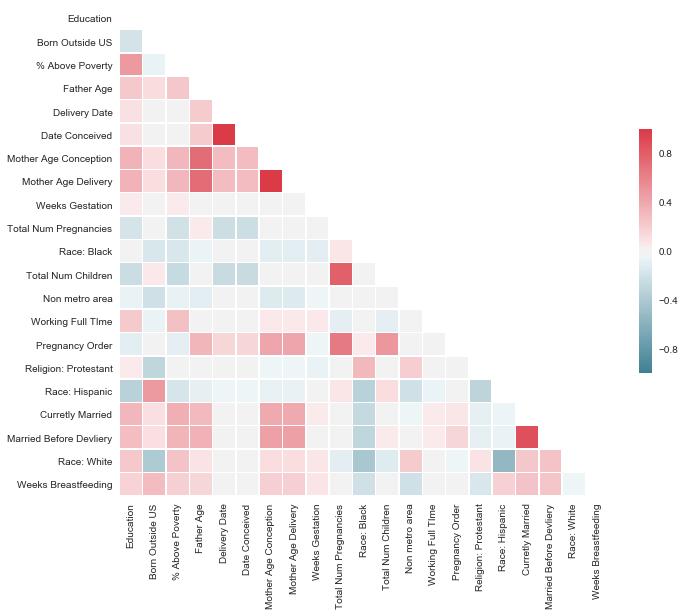

In [49]:
myfile_reduced.columns=['Education', 'Born Outside US', '% Above Poverty', 'Father Age', 'Delivery Date', 'Date Conceived',
       'Mother Age Conception', 'Mother Age Delivery', 'Weeks Gestation', 'Total Num Pregnancies', 'Race: Black', 'Total Num Children',
       'Non metro area', 'Working Full TIme', 'Pregnancy Order', 'Religion: Protestant', 'Race: Hispanic',
       'Currently Married', 'Married Before Devliery', 'Race: White', 'Weeks Breastfeeding']
# Compute the correlation matrix
corr = myfile_reduced.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})